In [ ]:
!pip install tensorflow
import tensorflow as tf
print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.12.0


In [ ]:
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('BBAS3.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-06,36.259998,36.580002,35.700001,35.759998,33.075912,8375000
1,2022-06-07,35.599998,35.860001,35.360001,35.509998,32.844673,7500300
2,2022-06-08,35.240002,35.509998,34.930000,35.189999,32.548698,8016800
3,2022-06-09,35.049999,35.590000,34.919998,35.139999,32.502445,10970600
4,2022-06-10,34.889999,35.369999,34.270000,34.549999,31.956730,33897700


In [ ]:
df.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-06,36.259998,36.580002,35.700001,35.759998,33.075912,8375000
1,2022-06-07,35.599998,35.860001,35.360001,35.509998,32.844673,7500300
2,2022-06-08,35.240002,35.509998,34.930000,35.189999,32.548698,8016800
3,2022-06-09,35.049999,35.590000,34.919998,35.139999,32.502445,10970600
4,2022-06-10,34.889999,35.369999,34.270000,34.549999,31.956730,33897700
...,...,...,...,...,...,...,...
246,2023-05-31,44.740002,45.139999,44.520000,44.619999,43.967335,17425400
247,2023-06-01,44.790001,45.029999,44.259998,44.740002,44.085583,10196900
248,2023-06-02,44.740002,44.740002,44.740002,44.740002,44.740002,0
249,2023-06-05,44.599998,45.290001,44.150002,45.020000,45.020000,13667000


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2023-05-31,44.740002,45.139999,44.520000,44.619999,43.967335,17425400
247,2023-06-01,44.790001,45.029999,44.259998,44.740002,44.085583,10196900
248,2023-06-02,44.740002,44.740002,44.740002,44.740002,44.740002,0
249,2023-06-05,44.599998,45.290001,44.150002,45.020000,45.020000,13667000
250,2023-06-06,45.029999,46.160000,44.959999,45.540001,45.540001,11435200


In [ ]:
#Tentando prever a propria ação pelo tempo que ela fecha
series = df[ 'Close' ].values.reshape(-1,1)

In [ ]:
#Normalizar dados
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [ ]:
#Usar os valores passados em T para tentar prever
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T ):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)     #Agora os dados ficam em N x T x D
Y = np.array(Y)
N = len(x)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (241, 10, 1) Y.shape (241,)


In [ ]:
#Modelo rnn
i = Input(shape=(T,1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss = 'mse',
    optimizer = Adam(learning_rate=0.1,)
)
#Treinando a RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 200,
    validation_data = (X[-N//2:], Y[-N//2:]),
)

Epoch 1/200
8/8 [==============================] - 14s 564ms/step - loss: 0.4815 - val_loss: 0.3187
Epoch 2/200
8/8 [==============================] - 0s 37ms/step - loss: 0.1791 - val_loss: 0.5034
Epoch 3/200
8/8 [==============================] - 0s 32ms/step - loss: 0.1219 - val_loss: 0.1549
Epoch 4/200
8/8 [==============================] - 0s 25ms/step - loss: 0.0881 - val_loss: 0.0784
Epoch 5/200
8/8 [==============================] - 0s 44ms/step - loss: 0.0706 - val_loss: 0.1640
Epoch 6/200
8/8 [==============================] - 0s 35ms/step - loss: 0.0713 - val_loss: 0.0704
Epoch 7/200
8/8 [==============================] - 0s 33ms/step - loss: 0.0653 - val_loss: 0.0358
Epoch 8/200
8/8 [==============================] - 0s 28ms/step - loss: 0.0648 - val_loss: 0.0196
Epoch 9/200
8/8 [==============================] - 0s 28ms/step - loss: 0.0643 - val_loss: 0.1475
Epoch 10/200
8/8 [==============================] - 0s 40ms/step - loss: 0.0748 - val_loss: 0.0626
Epoch 11/200
8/8 

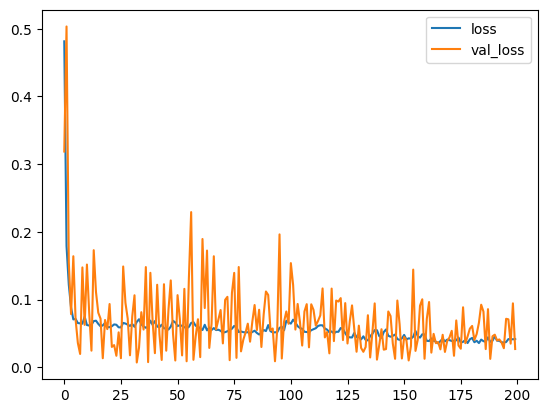

In [ ]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

8/8 [==============================] - 0s 3ms/step
(241, 1)


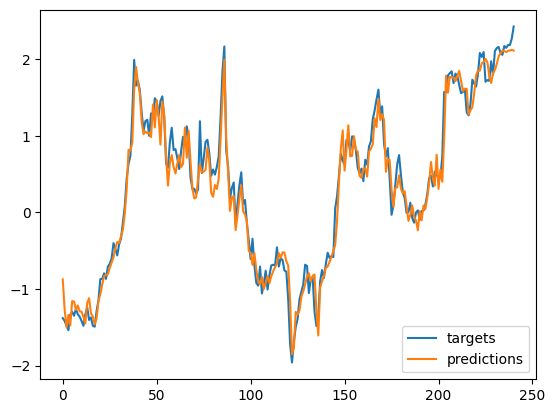

In [ ]:
#Previsão de uma passo usando alvos reais
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]

plt.plot(Y, label = 'targets')
plt.plot(predictions, label = 'predictions')
plt.legend()
plt.show()

1/1 [==============================] - 0s 24ms/step


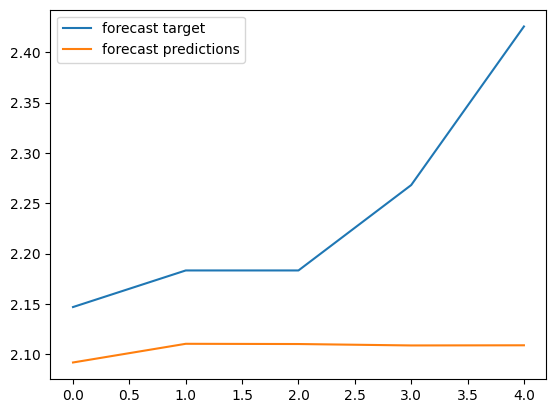

In [ ]:
#Previsão de vários passos
validation_target = Y[-N//2:]
validation_predictions = []

#Última entrada de treinamento
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0]

  #Atualizando lista de predição
  validation_predictions.append(p)

  #Nova entrada
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label = 'forecast target')
plt.plot(validation_predictions, label = 'forecast predictions')
plt.legend()

In [ ]:
#calculando o retorno a primeiro deslcoar os dados
df['PrevClose'] = df['Close'].shift(1)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PrevClose
0,2022-06-06,36.259998,36.580002,35.700001,35.759998,33.075912,8375000,NaN
1,2022-06-07,35.599998,35.860001,35.360001,35.509998,32.844673,7500300,35.759998
2,2022-06-08,35.240002,35.509998,34.930000,35.189999,32.548698,8016800,35.509998
3,2022-06-09,35.049999,35.590000,34.919998,35.139999,32.502445,10970600,35.189999
4,2022-06-10,34.889999,35.369999,34.270000,34.549999,31.956730,33897700,35.139999


In [ ]:
df['Return'] = (df['Close'] - df['PrevClose']) / df['PrevClose']

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PrevClose,Return
0,2022-06-06,36.259998,36.580002,35.700001,35.759998,33.075912,8375000,NaN,NaN
1,2022-06-07,35.599998,35.860001,35.360001,35.509998,32.844673,7500300,35.759998,-0.006991
2,2022-06-08,35.240002,35.509998,34.930000,35.189999,32.548698,8016800,35.509998,-0.009012
3,2022-06-09,35.049999,35.590000,34.919998,35.139999,32.502445,10970600,35.189999,-0.001421
4,2022-06-10,34.889999,35.369999,34.270000,34.549999,31.956730,33897700,35.139999,-0.016790


In [ ]:
df.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume,PrevClose,Return
1,2022-06-07,35.599998,35.860001,35.360001,35.509998,32.844673,7500300,35.759998,-0.006991
2,2022-06-08,35.240002,35.509998,34.930000,35.189999,32.548698,8016800,35.509998,-0.009012
3,2022-06-09,35.049999,35.590000,34.919998,35.139999,32.502445,10970600,35.189999,-0.001421
4,2022-06-10,34.889999,35.369999,34.270000,34.549999,31.956730,33897700,35.139999,-0.016790
5,2022-06-13,34.110001,34.439999,33.500000,33.759998,31.226028,14427700,34.549999,-0.022865
...,...,...,...,...,...,...,...,...,...
246,2023-05-31,44.740002,45.139999,44.520000,44.619999,43.967335,17425400,44.700001,-0.001790
247,2023-06-01,44.790001,45.029999,44.259998,44.740002,44.085583,10196900,44.619999,0.002689
248,2023-06-02,44.740002,44.740002,44.740002,44.740002,44.740002,0,44.740002,0.000000
249,2023-06-05,44.599998,45.290001,44.150002,45.020000,45.020000,13667000,44.740002,0.006258


<Axes: >

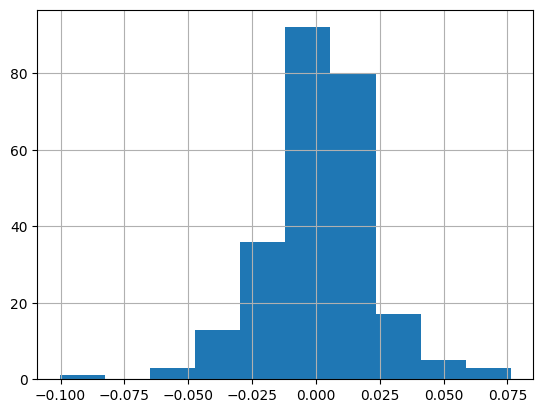

In [ ]:
df['Return'].hist()

In [ ]:
series = df['Return']. values[1:].reshape(-1,1)
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [ ]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T ):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(x)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (240, 10, 1) Y.shape (240,)


In [ ]:
#modelo rnn
i = Input(shape=(T,1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss = 'mse',
    optimizer = Adam(learning_rate=0.1,)
)
# Treinando a RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 80,
    validation_data = (X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
8/8 [==============================] - 3s 83ms/step - loss: 0.8697 - val_loss: 0.0505
Epoch 2/80
8/8 [==============================] - 0s 10ms/step - loss: 0.8573 - val_loss: 0.0525
Epoch 3/80
8/8 [==============================] - 0s 10ms/step - loss: 0.8574 - val_loss: 0.0484
Epoch 4/80
8/8 [==============================] - 0s 11ms/step - loss: 0.8505 - val_loss: 0.0492
Epoch 5/80
8/8 [==============================] - 0s 13ms/step - loss: 0.8602 - val_loss: 0.0440
Epoch 6/80
8/8 [==============================] - 0s 10ms/step - loss: 0.8423 - val_loss: 0.0443
Epoch 7/80
8/8 [==============================] - 0s 10ms/step - loss: 0.8243 - val_loss: 0.0422
Epoch 8/80
8/8 [==============================] - 0s 10ms/step - loss: 0.8177 - val_loss: 0.0676
Epoch 9/80
8/8 [==============================] - 0s 12ms/step - loss: 0.7973 - val_loss: 0.0472
Epoch 10/80
8/8 [==============================] - 0s 11ms/step - loss: 0.8080 - val_loss: 0.0645
Epoch 11/80
8/8 [============

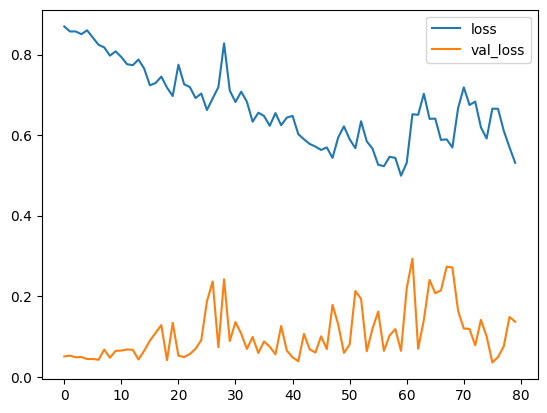

In [ ]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

8/8 [==============================] - 0s 3ms/step
(240, 1)


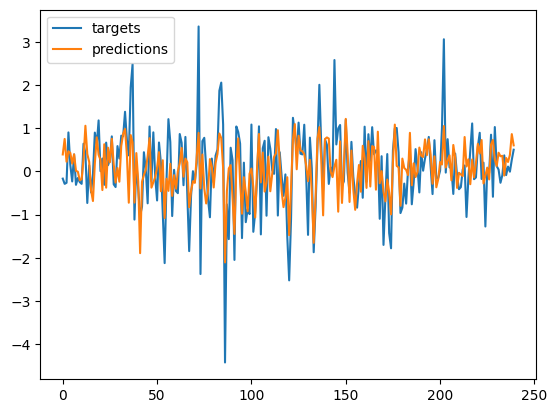

In [ ]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]

plt.plot(Y, label = 'targets')
plt.plot(predictions, label = 'predictions')
plt.legend()
plt.show()

1/1 [==============================] - 0s 35ms/step


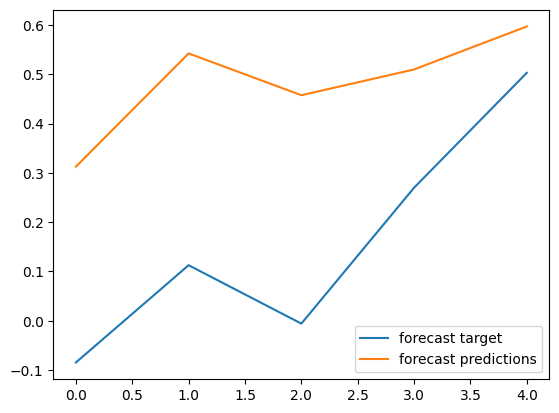

In [ ]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0]

  validation_predictions.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label = 'forecast target')
plt.plot(validation_predictions, label = 'forecast predictions')
plt.legend()

In [ ]:
input_data = df[['Open', 'High', 'Low', 'Close', 'Volume']].values
targets = df['Return'].values

In [ ]:
T = 10 #Número de etapas de tempo para observar a fim de fazer uma previsão para o próximo dia.
D = input_data.shape[1]
N = len(input_data) - T #T=10 -> 11 data points

In [ ]:
Ntrain = len(input_data) * 2 // 3
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T])
input_data = scaler.transform(input_data)

X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)
for t in range (Ntrain):
  X_train[t, :, :] = input_data[t:t+T]
  Y_train[t] = (targets[t+T] > 0)

In [ ]:
X_test = np.zeros((N - Ntrain, T, D))
Y_test = np.zeros(N - Ntrain)
for u in range (N - Ntrain):
  X_test[u, :, :] = input_data[t:t+T]
  Y_train[u] = (targets[t+T] > 0)

In [ ]:
i = Input(shape=(T,D))
x = LSTM(50)(i)
x = Dense(1, activation = 'sigmoid')(x)
model = Model(i, x)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate=0.001,),
    metrics = ['accuracy'],
)

r = model.fit(
    X_train, Y_train,
    batch_size = 32,
    epochs = 500,
    validation_data = (X_test, Y_test),
)

Epoch 1/400
6/6 [==============================] - 5s 143ms/step - loss: 0.2399 - accuracy: 0.6228 - val_loss: 0.3099 - val_accuracy: 0.0000e+00
Epoch 2/400
6/6 [==============================] - 0s 19ms/step - loss: 0.2153 - accuracy: 0.7425 - val_loss: 0.3542 - val_accuracy: 0.0000e+00
Epoch 3/400
6/6 [==============================] - 0s 19ms/step - loss: 0.1949 - accuracy: 0.7485 - val_loss: 0.4217 - val_accuracy: 0.0000e+00
Epoch 4/400
6/6 [==============================] - 0s 19ms/step - loss: 0.1800 - accuracy: 0.7485 - val_loss: 0.5008 - val_accuracy: 0.0000e+00
Epoch 5/400
6/6 [==============================] - 0s 17ms/step - loss: 0.1736 - accuracy: 0.7485 - val_loss: 0.5809 - val_accuracy: 0.0000e+00
Epoch 6/400
6/6 [==============================] - 0s 22ms/step - loss: 0.1734 - accuracy: 0.7485 - val_loss: 0.6360 - val_accuracy: 0.0000e+00
Epoch 7/400
6/6 [==============================] - 0s 17ms/step - loss: 0.1717 - accuracy: 0.7485 - val_loss: 0.6148 - val_accuracy: 0.

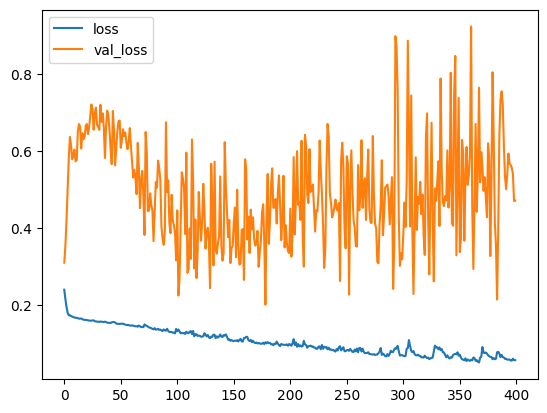

In [ ]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

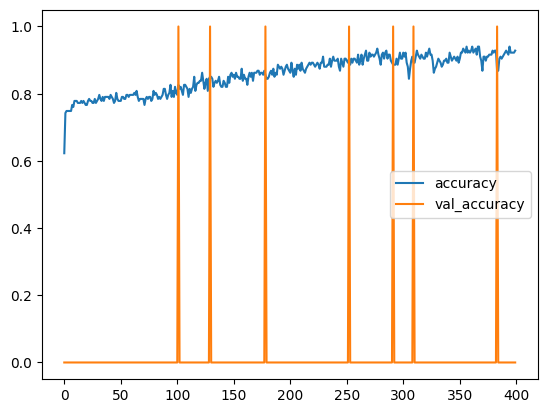

In [ ]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()